# Pattern matching for $k$-track permutations

# Preambule

### Imports

In [6]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [7]:
import seaborn as sns
sns.set_context("poster")
sns.set(font_scale=3., rc={'text.usetex' : True})
#sns.set_context("paper")
#sns.set(font='serif')
#sns.set_style("white", {
#        "font.family": "serif",
#        "font.serif": ["Times", "Palatino", "serif"]
#    })
#sns.set_style("whitegrid")

### Auxiliary functions

In [23]:
def format_duration(x):
    """Duration in ms.
    """
    (prefix, suffix)=x.split(' ')
    try:
        val = float(prefix)
        if suffix == 'ms' or suffix == 'm':
            return val
        elif suffix == 's':
            return val * 1000
        elif suffix == 'µs':
            return val / 1000
        elif suffix == "h":
            return val * 60 * 60 * 1000
        else: 
            print("prefix=-{}- suffix=-{}-".format(prefix, suffix))
            raise ValueError()
    except:
        raise

In [22]:
def format_strategy(s):
    """Shorter names for strategys.
    """
    try:
        if s == 'leftmost conflict first':
            return 'leftmost'
        elif s == 'leftmost horizontal conflict first':
            return 'lh'
        elif s == 'leftmost vertical conflict first':
            return 'lv'
        elif s == 'rightmost conflict first':
            return 'rightmost'
        elif s == 'rightmost horizontal conflict first':
            return 'rh'
        elif s == 'rightmost vertical conflict first':
            return 'rv'
    except:
        raise

## Report running time

### Reading and parsing benchmarks

In [105]:
from os import listdir
from os.path import isfile, join

def all_benchmark_files(path="./"):
    """Return the list of all benchmak files.
    """
    return [f for f in listdir(path) if isfile(join(path, f)) if f.startswith("ppattern-benchmark-") if f.endswith(".csv")]

df_benchmarks = {}
for f in all_benchmark_files():
    # parse cvs benchmark file
    #  m:         pattern size
    #  n:         permutation size
    #  k:         pattern is the union of at most k increasings
    #  l:         permutation is the union of at most l increasings
    #  p:         pattern
    #  q:         permutation
    #  embedding: solution
    #  strategy:  conflict selection strategy
    #  duration:  running time
    df_benchmark = pd.read_csv(f, names = ['m', 'n', 'k', 'l', 'p', 'q', 'embedding', 'strategy', 'duration'])
        
    # time in ms
    df_benchmark['duration'] = df_benchmark['duration'].apply(lambda x: format_duration(x))
    
    # shorter names for strategys
    # df_benchmark['strategy'] = df_benchmark['strategy'].apply(lambda s: format_strategy(s))

    # drop p column
    df_benchmark = df_benchmark.drop('p', 1)
    
    # drop q column
    df_benchmark = df_benchmark.drop('q', 1)
    
    # drop embedding column
    df_benchmark = df_benchmark.drop('embedding', 1)
    
    # split and add to the collection
    splitter = f.split('-')
    m = splitter[3].zfill(2)
    n = splitter[5].zfill(2)
    k = splitter[7].zfill(2)
    l = splitter[9].split('.')[0].zfill(2) # another split to remove the .csv suffix
    df_benchmarks[(m, n, k, l)] = df_benchmark
    

In [106]:
# show all benchmarks
print(df_benchmarks)
for key in sorted(df_benchmarks):
    print(key)
    print(df_benchmarks[key].describe())
    print()

{('10', '250', '02', '02'):       m    n  k  l                  strategy  duration
0    10  250  2  2   leftmost conflict first   2.40000
1    10  250  2  2  rightmost conflict first   0.38847
2    10  250  2  2   leftmost conflict first   2.69000
3    10  250  2  2  rightmost conflict first   0.28882
4    10  250  2  2   leftmost conflict first   2.54000
5    10  250  2  2  rightmost conflict first   0.36628
6    10  250  2  2   leftmost conflict first   2.87000
7    10  250  2  2  rightmost conflict first   0.70193
8    10  250  2  2   leftmost conflict first   2.41000
9    10  250  2  2  rightmost conflict first   0.38539
10   10  250  2  2   leftmost conflict first   2.37000
11   10  250  2  2  rightmost conflict first   0.33922
12   10  250  2  2   leftmost conflict first   2.35000
13   10  250  2  2  rightmost conflict first   0.31872
14   10  250  2  2   leftmost conflict first   2.39000
15   10  250  2  2  rightmost conflict first   0.26110
16   10  250  2  2   leftmost conflic

           m      n      k      l     duration
count  380.0  380.0  380.0  380.0   380.000000
mean    12.0  250.0    6.0    6.0    21.715871
std      0.0    0.0    0.0    0.0   117.641080
min     12.0  250.0    6.0    6.0     0.124390
25%     12.0  250.0    6.0    6.0     1.120000
50%     12.0  250.0    6.0    6.0     3.210000
75%     12.0  250.0    6.0    6.0     5.940000
max     12.0  250.0    6.0    6.0  1330.000000

('12', '250', '08', '08')
           m      n      k      l     duration
count  380.0  380.0  380.0  380.0   380.000000
mean    12.0  250.0    8.0    8.0    51.364612
std      0.0    0.0    0.0    0.0   196.457578
min     12.0  250.0    8.0    8.0     0.090990
25%     12.0  250.0    8.0    8.0     2.947500
50%     12.0  250.0    8.0    8.0     6.260000
75%     12.0  250.0    8.0    8.0    26.747500
max     12.0  250.0    8.0    8.0  2260.000000

('14', '250', '02', '02')
           m      n      k      l    duration
count  380.0  380.0  380.0  380.0  380.000000
mean    

('22', '250', '04', '04')
           m      n      k      l     duration
count  380.0  380.0  380.0  380.0   380.000000
mean    22.0  250.0    4.0    4.0    32.723888
std      0.0    0.0    0.0    0.0   168.517544
min     22.0  250.0    4.0    4.0     0.096530
25%     22.0  250.0    4.0    4.0     3.070000
50%     22.0  250.0    4.0    4.0     5.685000
75%     22.0  250.0    4.0    4.0    17.035000
max     22.0  250.0    4.0    4.0  2450.000000

('22', '250', '06', '06')
           m      n      k      l      duration
count  380.0  380.0  380.0  380.0    380.000000
mean    22.0  250.0    6.0    6.0    456.943733
std      0.0    0.0    0.0    0.0   2729.554280
min     22.0  250.0    6.0    6.0      0.095820
25%     22.0  250.0    6.0    6.0      4.437500
50%     22.0  250.0    6.0    6.0     19.225000
75%     22.0  250.0    6.0    6.0    138.902500
max     22.0  250.0    6.0    6.0  45060.000000

('22', '250', '08', '08')
           m      n      k      l      duration
count  380.0  380

Concat pandas data frames by pattern size.

### Reporting benchmarks by pattern size and split parameter.

In [107]:
keys = df_benchmarks.keys()
ms = sorted(list(set(key[0] for key in keys)))
ns = sorted(list(set(key[1] for key in keys)))
ks = sorted(list(set(key[2] for key in keys)))
ls = sorted(list(set(key[3] for key in keys)))

print(ms)
print(ns)
print(ks)
print(ls)

['08', '10', '12', '14', '16', '18', '20', '22', '24']
['250']
['02', '04', '06', '08']
['02', '04', '06', '08']


i=0, j=0
i=0, j=1
i=0, j=2
i=1, j=0
i=1, j=1
i=1, j=2
i=2, j=0
i=2, j=1
i=2, j=2


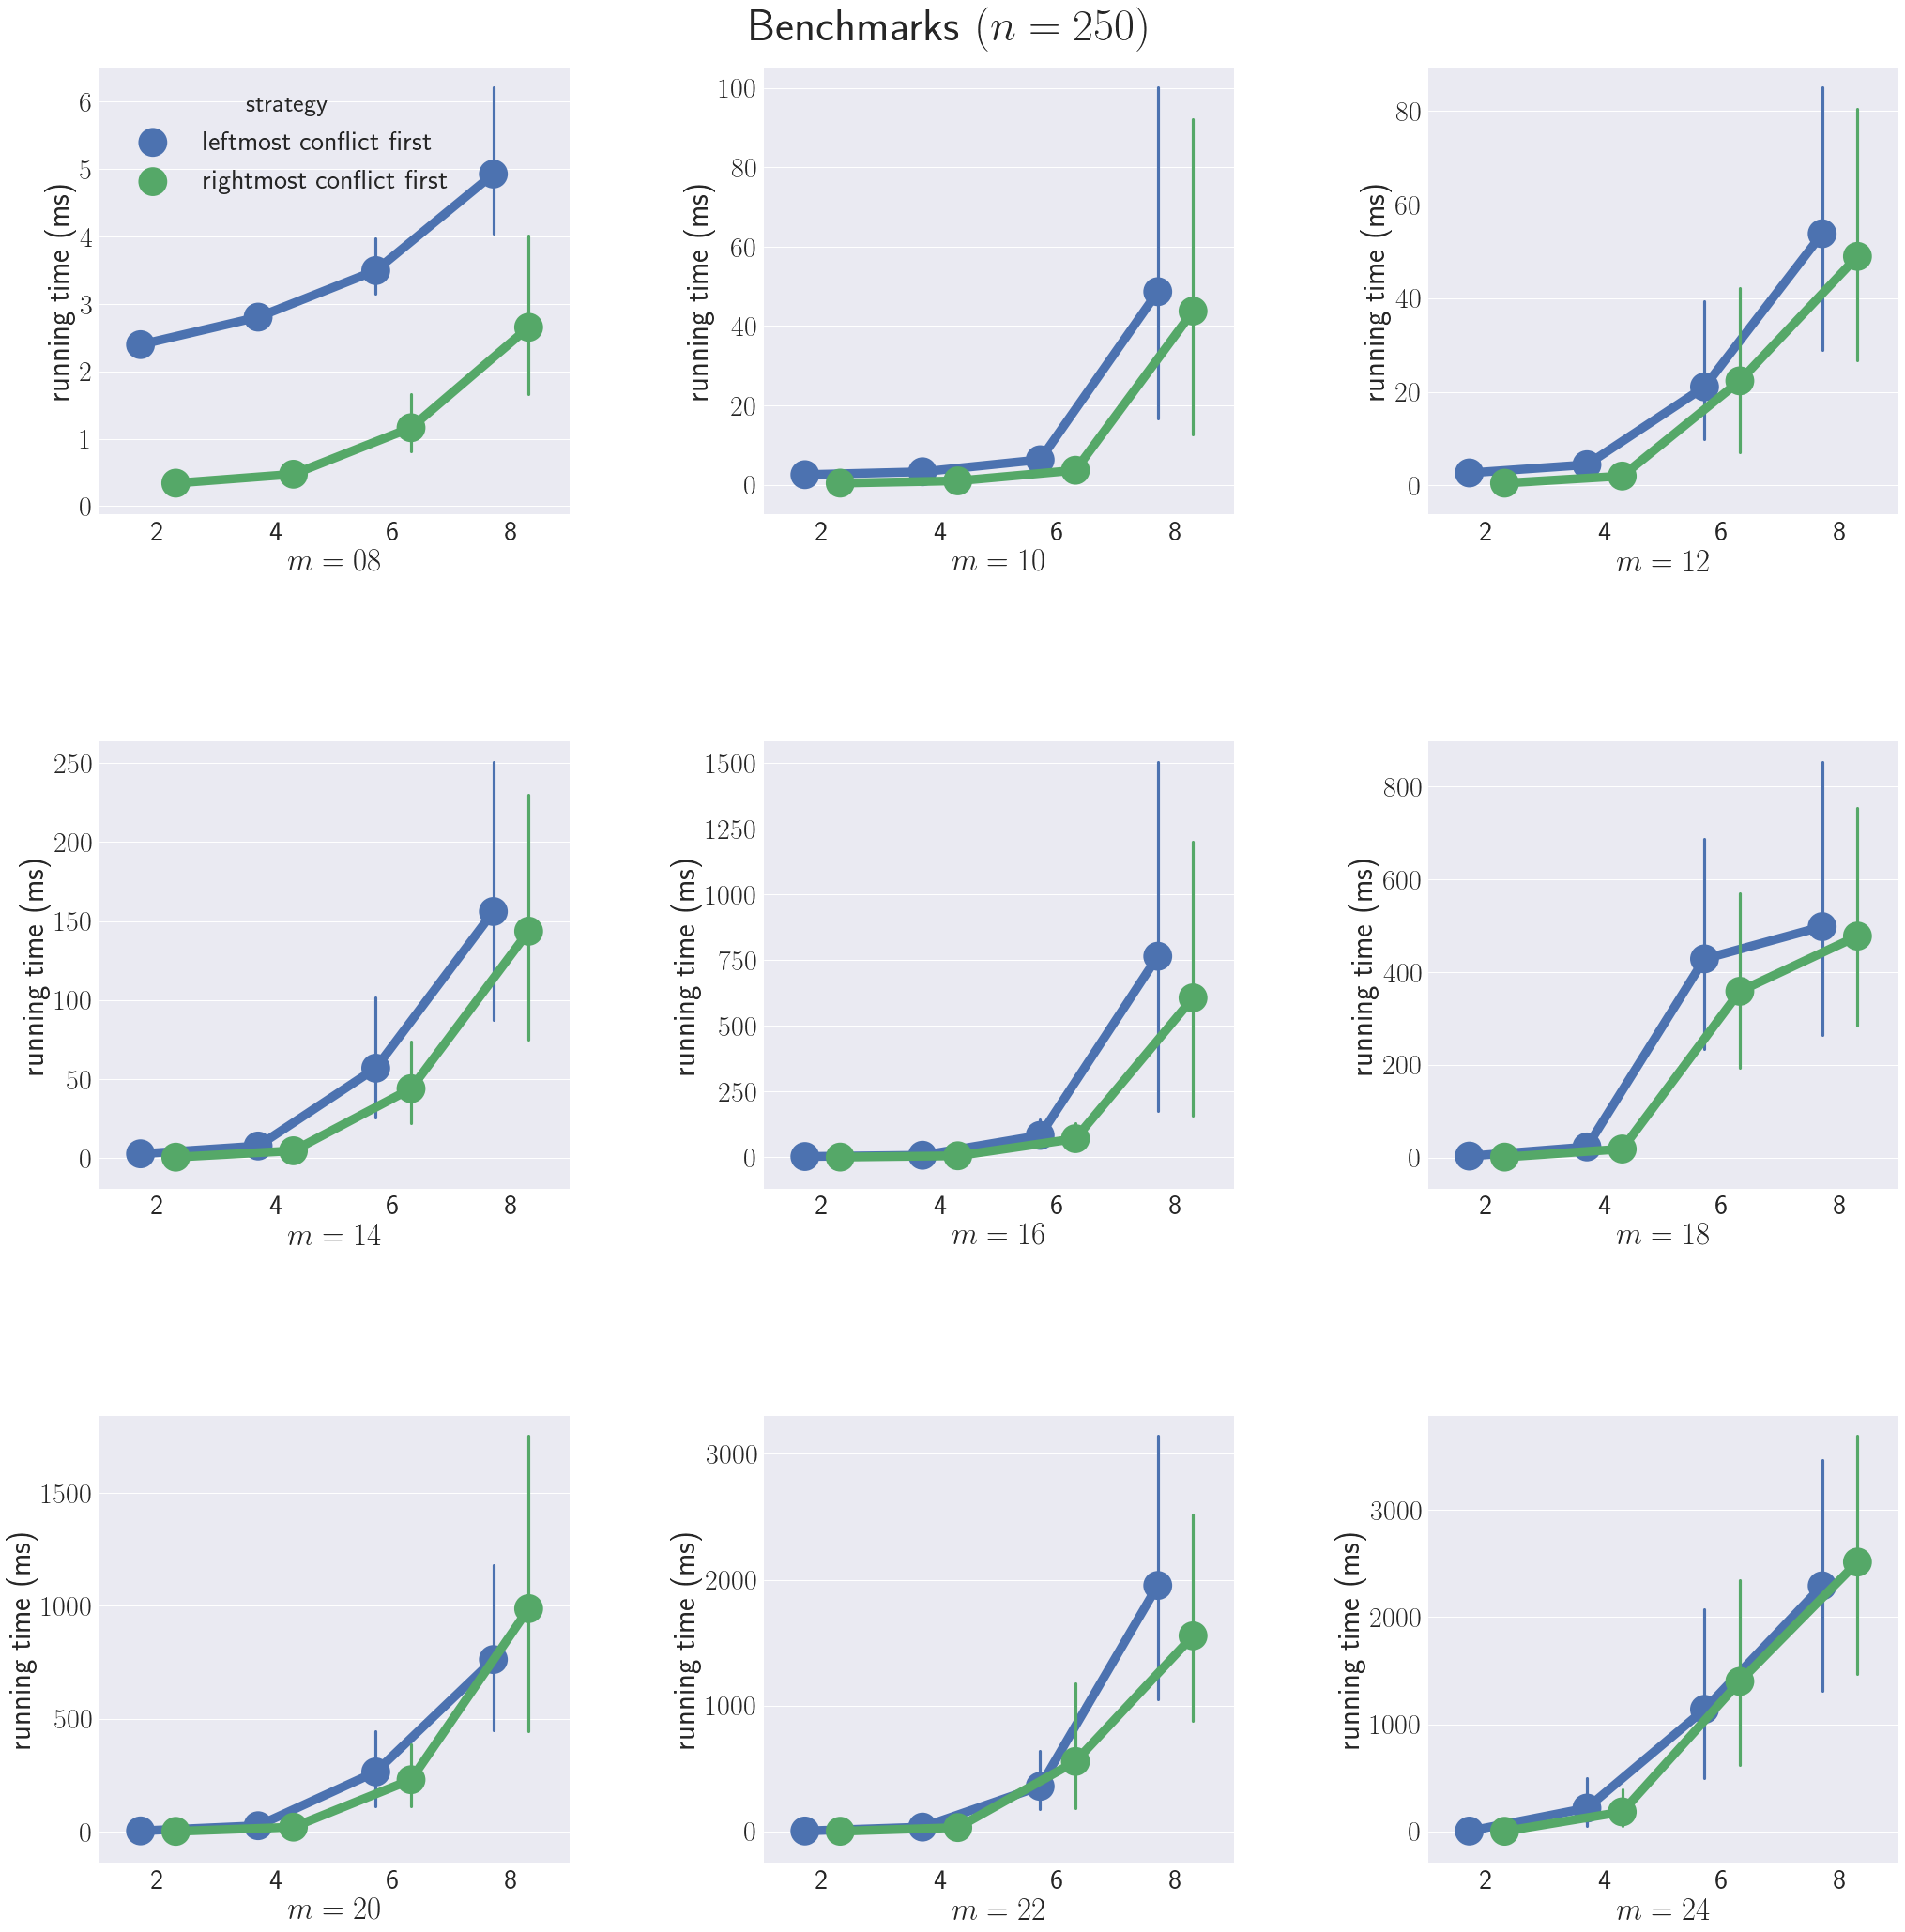

In [108]:
# row index
i=0
# column index
j=0

# plot
for n in ns:
    mpl.rcParams['figure.figsize'] = (30.0, 30.0)
    fig, axes = plt.subplots(nrows=3, ncols=3, sharey=False)
    label_n = r'Benchmarks $(n={})$'.format(n)
    fig.suptitle(label_n, fontsize=48)

    df = {}
    for m in ms:
        print("i={}, j={}".format(i, j))
        data = pd.concat([df_benchmarks[(m, n, k, k)] for k in ks])
        sns.pointplot(ax=axes[i][j], data=data, x="k", y="duration", hue="strategy", scale=3.0,
                      dodge=.3, join=True, markers=['o', 'o'], linestyles=['-', '-'])
        label_m = r'$m={}$'.format(m)
        axes[i][j].set(xlabel = label_m, ylabel=r'running time (ms)')
        if i!=0 or j!=0:
            axes[i][j].legend_.remove()
        #axes[i][j].set_ylim(-10,)
        j = j+1
        if j == 3:
            i = i+1
            j = 0
    sns.despine(left=True)
    plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
    fig.subplots_adjust(top=0.95)

    name = '-'.join(['benchmarks', m, n, k, k])
    fig.savefig('benchmark' + '.pdf', format='pdf', close=True, verbose=True, dpi=1200)


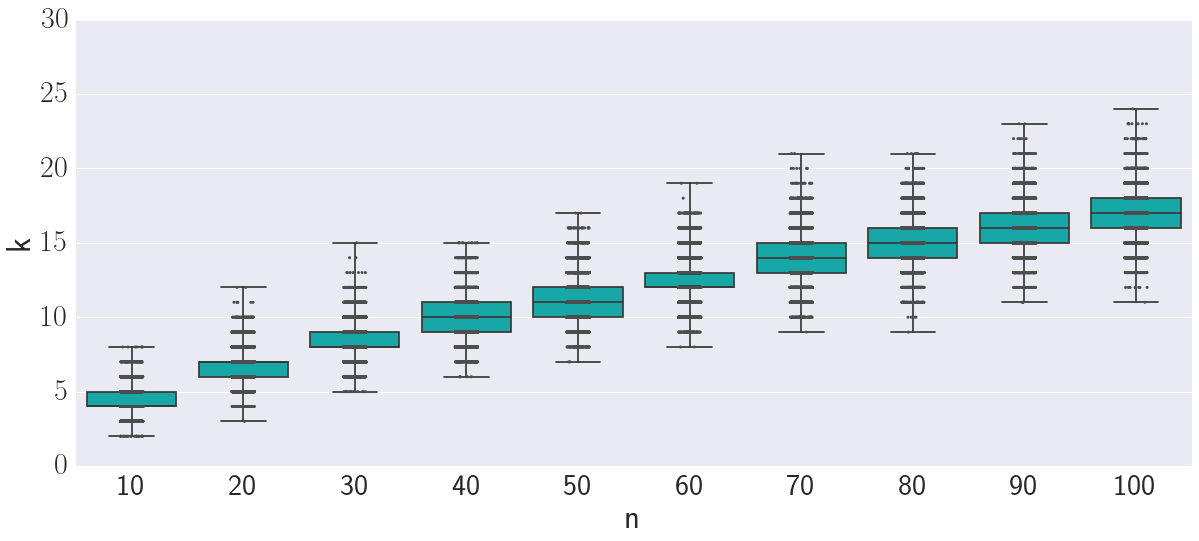

In [40]:
mpl.rcParams['figure.figsize'] = (20.0, 8.0)

df = pd.read_csv('ppattern-estimate-split-10-100-10.csv', names = ['n', 'k'])

ax = sns.boxplot(x="n", y="k", data=df, whis=np.inf, color="c")
stripplot = sns.stripplot(x="n", y="k", data=df, jitter=True, size=3, color=".3", linewidth=0)

fig = stripplot.get_figure()
fig.savefig('ppattern-estimate-split-10-100-10.pdf', format='pdf', close=True, verbose=True, dpi=1200)

[ 10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44
  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80
  82  84  86  88  90  92  94  96  98 100]
8


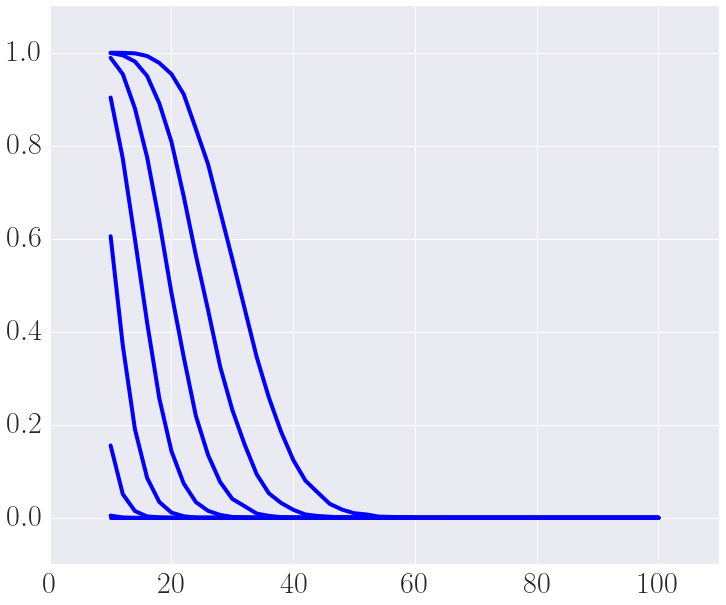

In [57]:
df = pd.read_csv('ppattern-estimate-split-10-100-2.csv', names = ['n', 'k'])

# distinct n
distinct_n = df.n.unique()
max_k = 8

print(distinct_n)
print(max_k)

t = {}
for n in distinct_n:
    t[n] = {}
    for k in range(1, max_k+1):
        t[n][k] = 0

for (_, row) in df.iterrows():
    n = row['n']
    k = int(row['k'])
    for j in range (k, max_k+1):
        t[n][j] += 1

for n in t:
    for k in t[n]:
        t[n][k] = float(t[n][k]) / 10000.0
        
t2 = {}
for n in t:
    for k in t[n]:
        if k not in t2:
            t2[k] = {} 
        t2[k][n] = t[n][k]
        

sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (12.0, 10.0)
mpl.rcParams.update({'font.size': 8})

axes = plt.gca()
axes.set_xlim(0, 110)
axes.set_ylim(-0.1, 1.1)

for k in sorted(t2.keys()):
    xs = list(sorted(t2[k].keys()))
    ys = [t2[k][n] for n in xs]
    plt.plot(xs, ys, 'b-', linewidth=4.0)

plt.savefig("ppattern-estimate-split-10-100-2.pdf", bbox_inches='tight')

## Comparing strategies

Statistical analysis of the benchmarks for 3 strategies: 
**leftmost order conflict first**, **leftmost value conflict first** and **leftmost conflict**.

1. **leftmost order conflict first**. For resolving conflicts, the leftmost order conflict w.r.t to $x$-coordinate is selected. If there is no order conflict, the leftmost value conflict w.r.t to $x$-coordinate is selected.
2. **leftmost value conflict first**. For resolving conflicts, the leftmost value conflict w.r.t to $x$-coordinate is selected. If there is no value conflict, the leftmost order conflict w.r.t to $x$-coordinate is selected.
3. **leftmost conflict**. For resolving conflicts, the leftmost conflict w.r.t to $x$-coordinate is selected (this conflict is either an order conflict or a value conflict).

In [167]:
strategies = ['leftmost order conflict first', 'leftmost value conflict first', 'leftmost conflict']

df_complete = pd.concat([df_benchmarks[key] for key in df_benchmarks])

m_values   = sorted(df_complete.m.unique())
print('m values={}'.format(m_values))
k_values = sorted(df_complete.k.unique())
print('k values={}'.format(k_values))

df_details = {}
df_leftmost_order_conflict_first = {}
df_leftmost_value_conflict_first = {}
df_leftmost_conflict = {}
anova = {}
groups = {}
for m in m_values:
    for k in k_values:
        # select rows
        df_m_k = df_complete.loc[(df_complete['m'] == m) & (df_complete['k'] == k)]
        
        # extract individual stategy groups
        df_leftmost_order_conflict_first_m_k = df_m_k.loc[df_m_k['strategy'] == 'leftmost order conflict first']
        df_leftmost_value_conflict_first_m_k = df_m_k.loc[df_m_k['strategy'] == 'leftmost value conflict first']
        df_leftmost_conflict_m_k = df_m_k.loc[df_m_k['strategy'] == 'leftmost conflict']
        


        # assign
        df_details[(m,k)] = df_m_k
        df_leftmost_order_conflict_first[(m, k)] = df_leftmost_order_conflict_first_m_k['duration'].values
        df_leftmost_value_conflict_first[(m, k)] = df_leftmost_value_conflict_first_m_k['duration'].values
        df_leftmost_conflict[(m, k)] = df_leftmost_conflict_m_k['duration'].values
        
        # Perform the ANOVA
        anova[(m, k)] = stats.f_oneway(df_leftmost_order_conflict_first[(m, k)], 
                                       df_leftmost_value_conflict_first[(m, k)],
                                       df_leftmost_conflict[(m, k)])

m values=[8, 10, 12, 14, 16, 18]
k values=[2, 4, 6, 8]


In [168]:
for (m, k) in anova:
    print("m={}, k={}, pvalue={}".format(m, k, anova[(m, k)][1]))

m=18, k=8, pvalue=0.5711461860272378
m=16, k=6, pvalue=0.726949910064542
m=16, k=8, pvalue=0.887774315288484
m=10, k=4, pvalue=7.365822237256172e-84
m=18, k=2, pvalue=8.99150394735824e-161
m=14, k=4, pvalue=0.00043494483403562625
m=10, k=6, pvalue=0.026438845265509235
m=16, k=2, pvalue=1.3658651629066387e-193
m=14, k=6, pvalue=0.55566021749566
m=18, k=6, pvalue=0.4092916108182827
m=12, k=4, pvalue=1.8185812830190133e-09
m=12, k=2, pvalue=0.0
m=14, k=2, pvalue=2.3500407253526693e-249
m=8, k=2, pvalue=0.0
m=10, k=8, pvalue=0.7041734087447162
m=16, k=4, pvalue=0.2677138101468426
m=18, k=4, pvalue=0.7371445831575976
m=12, k=6, pvalue=0.6154446494268735
m=10, k=2, pvalue=0.0
m=8, k=8, pvalue=6.954863824392422e-07
m=8, k=6, pvalue=2.4095330463753686e-23
m=8, k=4, pvalue=0.0
m=14, k=8, pvalue=0.5066567170177815
m=12, k=8, pvalue=0.07571959566257769


## Brenchmarking pattern matching for $321$-avoiding permutations

In [58]:
# read csv benchmark file
df_321_benchmarks = pd.read_csv('ppattern-321-avoiding-benchmark-8-18-100-600.csv', 
                                names = ['m', 'n', 'k', 'p', 'q', 'strategy', 'embedding', 'duration'])
        
# time in ms
df_321_benchmarks['duration'] = df_321_benchmarks['duration'].apply(lambda x: format(x))
    
# drop p column
df_321_benchmarks = df_321_benchmarks.drop('p', 1)
    
# drop q column
df_321_benchmarks = df_321_benchmarks.drop('q', 1)
    
# drop embedding column
df_321_benchmarks = df_321_benchmarks.drop('embedding', 1)

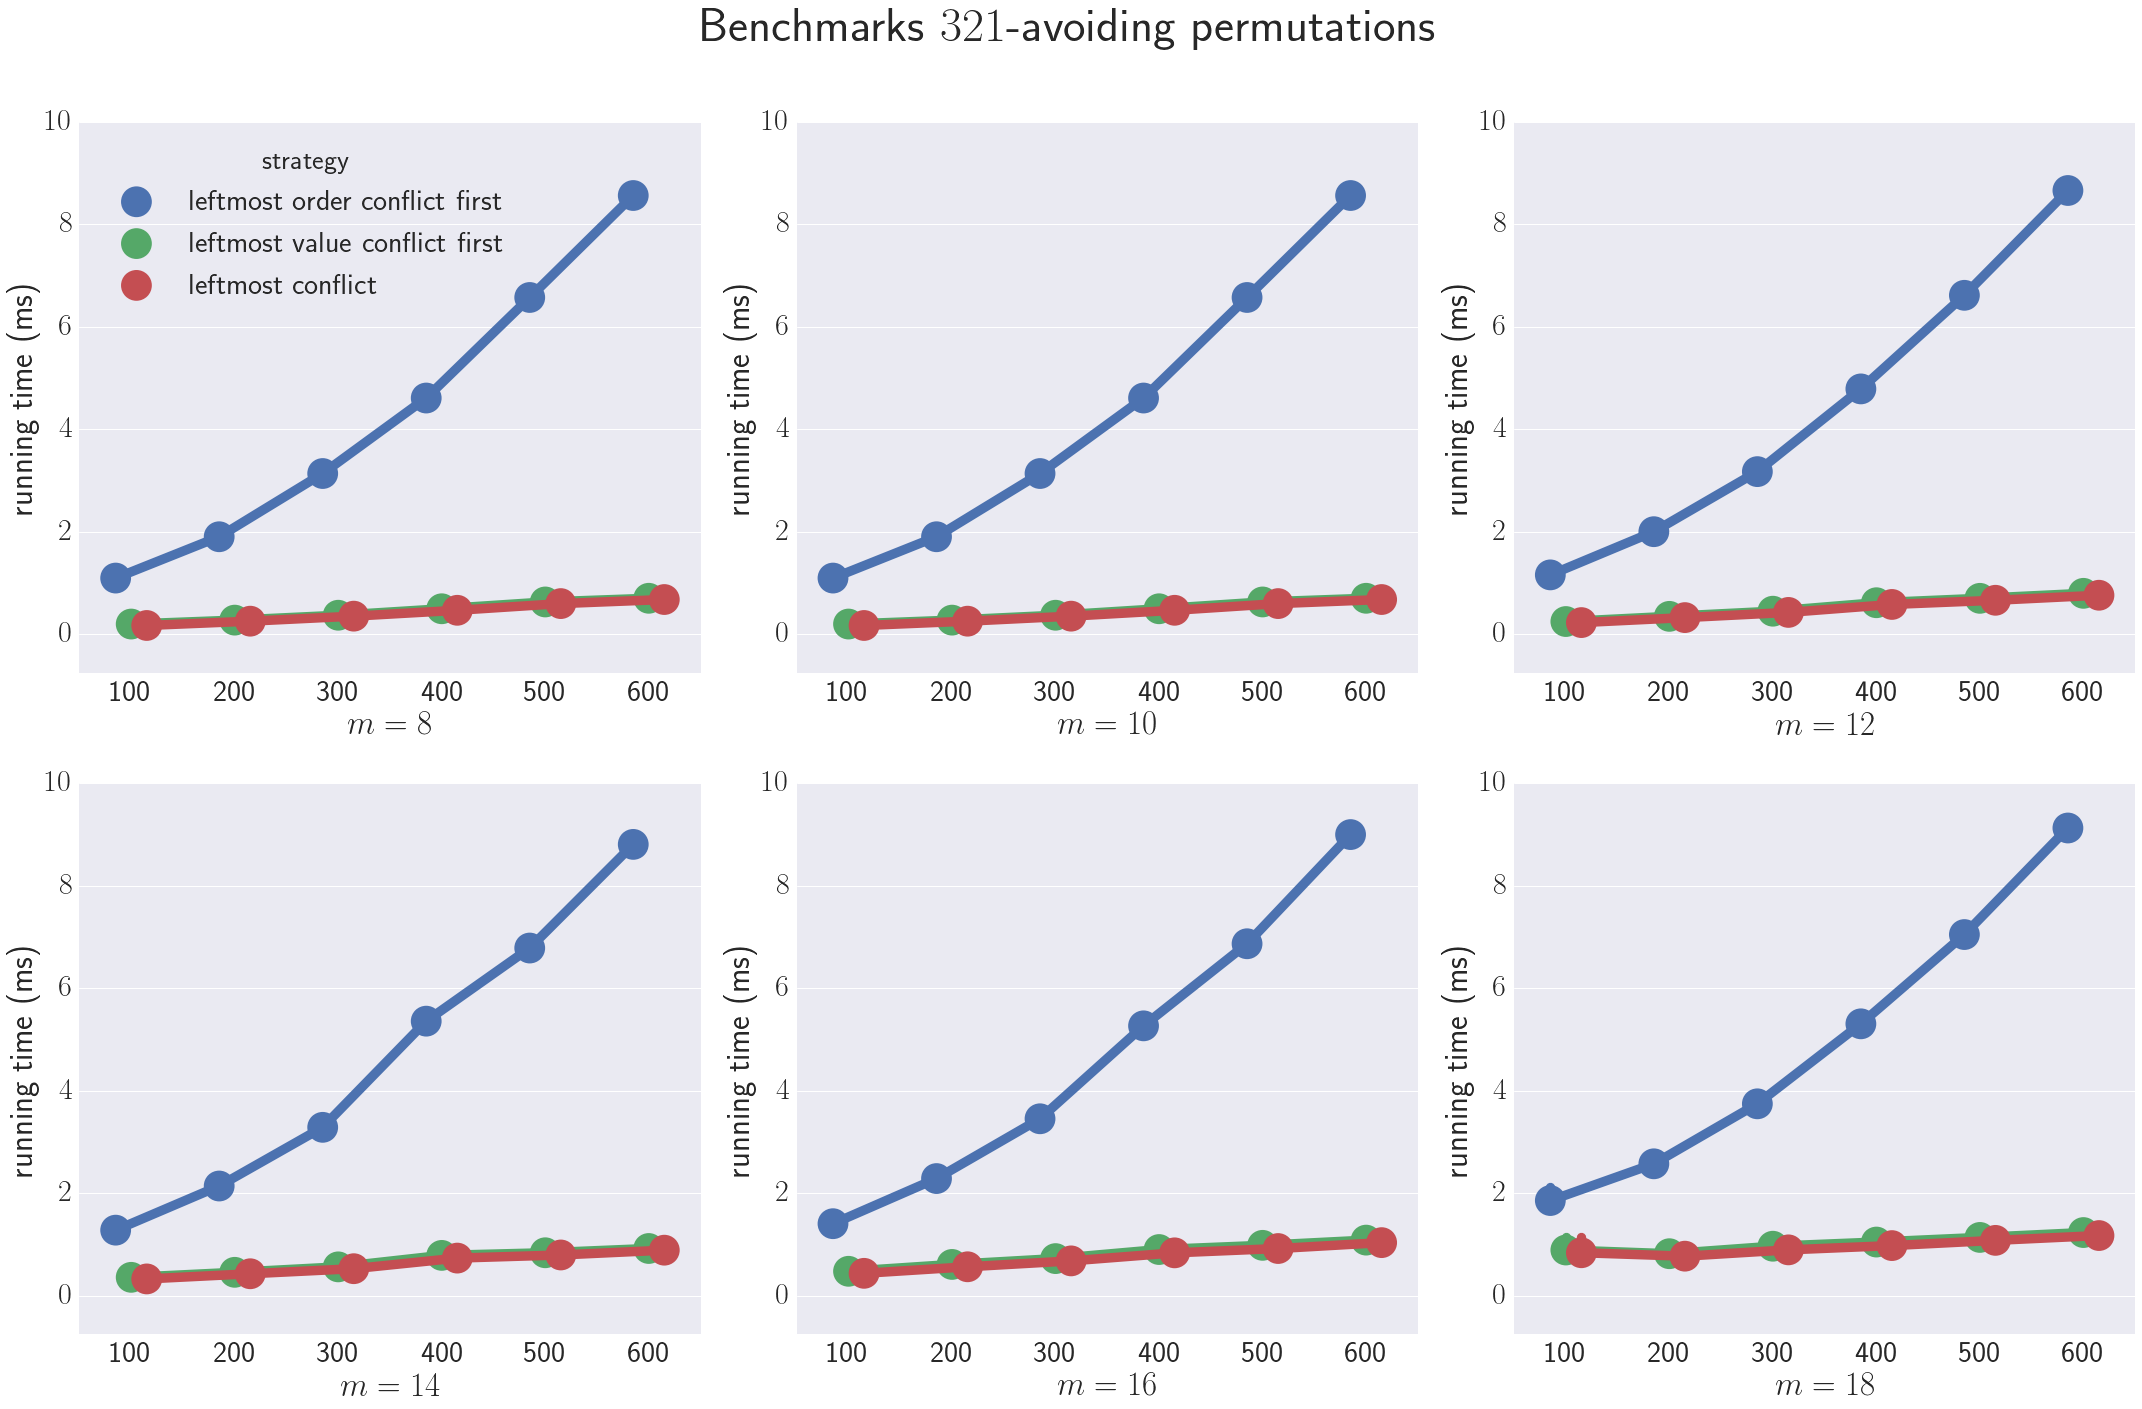

In [96]:
mpl.rcParams['figure.figsize'] = (30.0, 20.0)
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False)
fig.suptitle(r'Benchmarks $321$-avoiding permutations', fontsize=48)

df_321_benchmarks_8 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 10]
sns.pointplot(ax=axes[0][0], data=df_321_benchmarks_8, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[0][0].set(xlabel = r'$m=8$', ylabel=r'running time (ms)')
#axes[0][0].legend_.remove()
axes[0][0].set_ylim(-0.75,)

df_321_benchmarks_10 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 10]
sns.pointplot(ax=axes[0][1], data=df_321_benchmarks_10, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[0][1].set(xlabel = r'$m=10$', ylabel=r'running time (ms)')
axes[0][1].legend_.remove()
axes[0][1].set_ylim(-0.75,)

df_321_benchmarks_12 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 12]
sns.pointplot(ax=axes[0][2], data=df_321_benchmarks_12, x="n", y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[0][2].set(xlabel = r'$m=12$', ylabel=r'running time (ms)')
axes[0][2].legend_.remove()
axes[0][2].set_ylim(-0.75,)

df_321_benchmarks_14 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 14]
sns.pointplot(ax=axes[1][0], data=df_321_benchmarks_14, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[1][0].set(xlabel = r'$m=14$', ylabel=r'running time (ms)')
axes[1][0].legend_.remove()
axes[1][0].set_ylim(-0.75,)

df_321_benchmarks_16 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 16]
sns.pointplot(ax=axes[1][1], data=df_321_benchmarks_16, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[1][1].set(xlabel = r'$m=16$', ylabel=r'running time (ms)')
axes[1][1].legend_.remove()
axes[1][1].set_ylim(-0.75,)

df_321_benchmarks_18 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 18]
sns.pointplot(ax=axes[1][2], data=df_321_benchmarks_18, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[1][2].set(xlabel = r'$m=18$', ylabel=r'running time (ms)')
axes[1][2].legend_.remove()
axes[1][2].set_ylim(-0.75,)

sns.despine(left=True) 
plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
fig.subplots_adjust(top=0.9)

fig.savefig('ppattern-benchmarks-321-avoiding.pdf', format='pdf', close=True, verbose=True, dpi=1200)

In [97]:
strategies = ['leftmost order conflict first', 'leftmost value conflict first', 'leftmost conflict']

m_values   = sorted(df_321_benchmarks.m.unique())
print('m values={}'.format(m_values))
n_values = sorted(df_321_benchmarks.n.unique())
print('n values={}'.format(n_values))

df_details = {}
df_leftmost_order_conflict_first = {}
df_leftmost_value_conflict_first = {}
df_leftmost_conflict = {}
anova = {}
groups = {}
for m in m_values:
    for n in n_values:
        # select rows
        df_m_n = df_321_benchmarks.loc[(df_321_benchmarks['m'] == m) & (df_321_benchmarks['n'] == n)]
        
        # extract individual stategy groups
        df_leftmost_order_conflict_first_m_n = df_m_n.loc[df_m_n['strategy'] == 'leftmost order conflict first']
        df_leftmost_value_conflict_first_m_n = df_m_n.loc[df_m_n['strategy'] == 'leftmost value conflict first']
        df_leftmost_conflict_m_n = df_m_n.loc[df_m_n['strategy'] == 'leftmost conflict']
        
        # assign
        df_details[(m, n)] = df_m_n
        df_leftmost_order_conflict_first[(m, n)] = df_leftmost_order_conflict_first_m_n['duration'].values
        df_leftmost_value_conflict_first[(m, n)] = df_leftmost_value_conflict_first_m_n['duration'].values
        df_leftmost_conflict[(m, n)] = df_leftmost_conflict_m_n['duration'].values
        
        # Perform the ANOVA
        anova[(m, n)] = stats.f_oneway(df_leftmost_order_conflict_first[(m, n)], 
                                       df_leftmost_value_conflict_first[(m, n)],
                                       df_leftmost_conflict[(m, n)])

m values=[8, 10, 12, 14, 16, 18]
n values=[100, 200, 300, 400, 500, 600]


In [98]:
anova

{(8, 100): F_onewayResult(statistic=19129.069407245192, pvalue=0.0),
 (8, 200): F_onewayResult(statistic=19682.832053031965, pvalue=0.0),
 (8, 300): F_onewayResult(statistic=22134.562733128732, pvalue=0.0),
 (8, 400): F_onewayResult(statistic=19192.25959862825, pvalue=0.0),
 (8, 500): F_onewayResult(statistic=25226.672128700076, pvalue=0.0),
 (8, 600): F_onewayResult(statistic=22038.143676015119, pvalue=0.0),
 (10, 100): F_onewayResult(statistic=13791.624725457968, pvalue=0.0),
 (10, 200): F_onewayResult(statistic=17207.947715924503, pvalue=0.0),
 (10, 300): F_onewayResult(statistic=16433.96620462451, pvalue=0.0),
 (10, 400): F_onewayResult(statistic=20725.600032967723, pvalue=0.0),
 (10, 500): F_onewayResult(statistic=17956.672174959593, pvalue=0.0),
 (10, 600): F_onewayResult(statistic=26525.856890026345, pvalue=0.0),
 (12, 100): F_onewayResult(statistic=8275.0613005522173, pvalue=0.0),
 (12, 200): F_onewayResult(statistic=11669.023035152324, pvalue=0.0),
 (12, 300): F_onewayResult(s

In [100]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for m in m_values:
    for n in n_values:
        tukey = pairwise_tukeyhsd(endog=df_m_n['duration'],     # Data
                                  groups=df_m_n['strategy'],   # Groups
                                  alpha=0.05)          # Significance level

        #tukey.plot_simultaneous()    # Plot group confidence intervals
        #plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")
    
        print("m={}, n={}".format(m, n))
        print(tukey.summary())

m=8, n=100
                     Multiple Comparison of Means - Tukey HSD,FWER=0.05                    
            group1                        group2            meandiff  lower   upper  reject
-------------------------------------------------------------------------------------------
      leftmost conflict       leftmost order conflict first  7.9542   7.8333  8.075   True 
      leftmost conflict       leftmost value conflict first  0.0585  -0.0624  0.1793 False 
leftmost order conflict first leftmost value conflict first -7.8957  -8.0166 -7.7748  True 
-------------------------------------------------------------------------------------------
m=8, n=200
                     Multiple Comparison of Means - Tukey HSD,FWER=0.05                    
            group1                        group2            meandiff  lower   upper  reject
-------------------------------------------------------------------------------------------
      leftmost conflict       leftmost order conflict firs